<a href="https://colab.research.google.com/github/AngelinaSmi/Digital-image-processing/blob/main/Lb7_DIP_Smirnova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа № 7 Смирновой А.Е. 24ВВИм1**

Задание: найти шаблон на изображении.

Загружем необходимые библиотеки, изображение, шаблон, преобразуем их в модель RGB и выведим их.

In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Изменим стандартный размер графиков matplotlib
WIDTH_SIZE = 15
HEIGHT_SIZE = 10
plt.rcParams["figure.figsize"] = [WIDTH_SIZE, HEIGHT_SIZE]

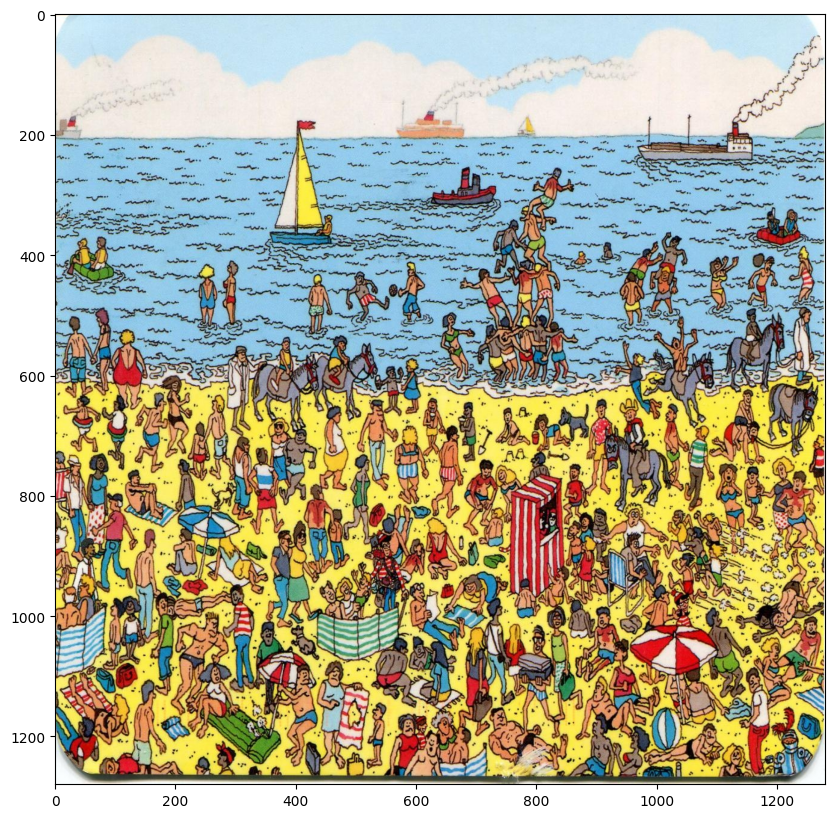

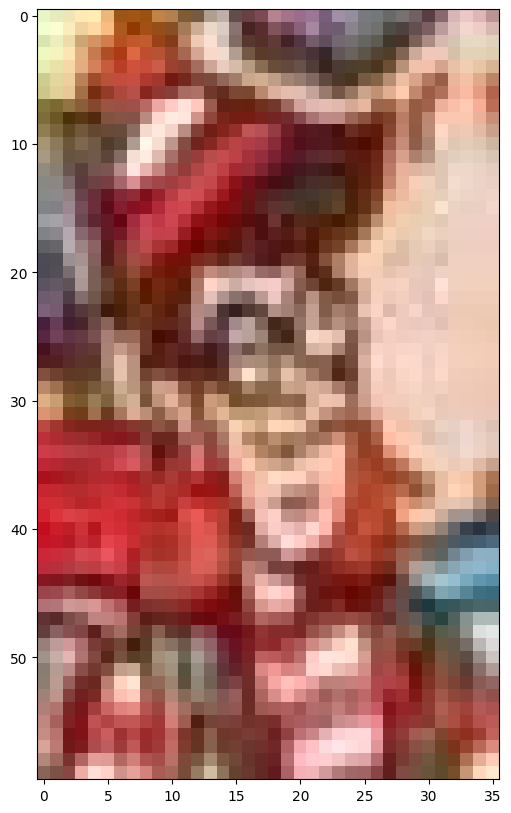

In [5]:
rgb_img = cv2.imread('lb7.jpg', cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB))
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

template = cv2.imread('tmplenemy.jpg')
plt.figure()
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
gray_templ = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

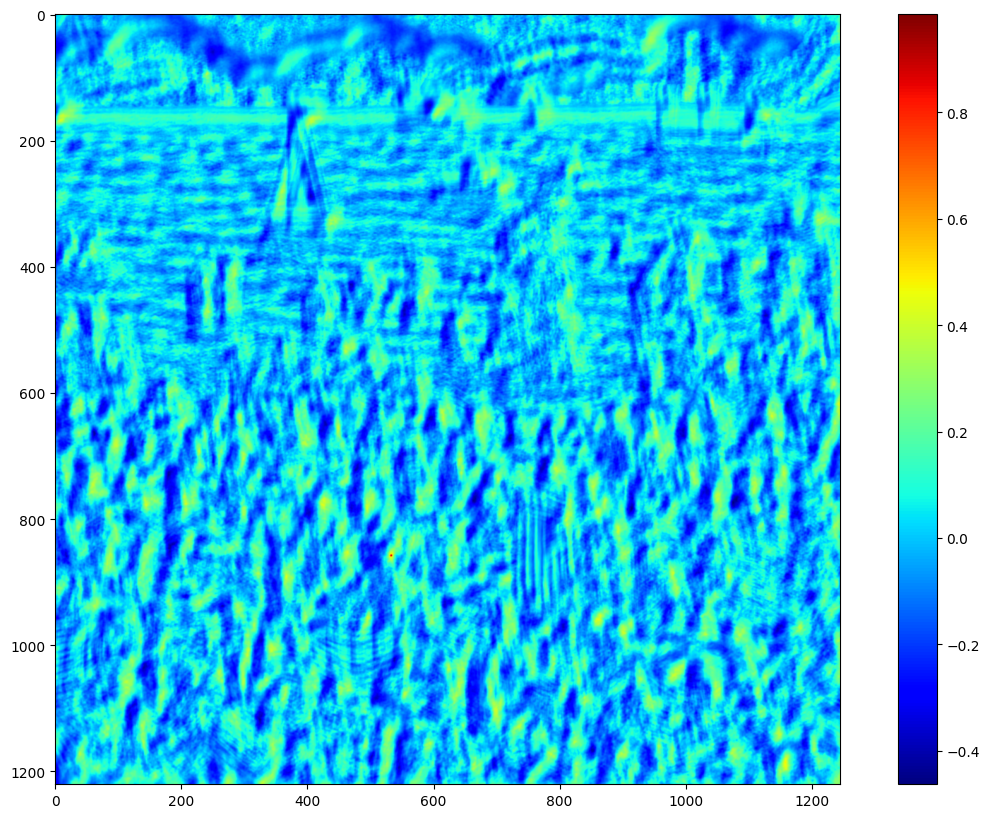

In [3]:
# Считаем размеры шаблона
w, h = template.shape[:-1]

# Вызываем функцию cv2.matchTemplate для вычисления метрики схожести
# в качестве параметров передаем изображение, шаблон и тип вычисляемой метрики
res = cv2.matchTemplate(gray_img,gray_templ,cv2.TM_CCOEFF_NORMED)

# Возможные варианты метрик:
#    cv2.TM_SQDIFF — сумма квадратов разниц значений пикселей
#    cv2.TM_SQDIFF_NORMED — сумма квадрат разниц цветов, отнормированная в диапазон 0..1.
#    cv2.TM_CCORR — сумма поэлементных произведений шаблона и сегмента картинки
#    cv2.TM_CCORR_NORMED — сумма поэлементных произведений, отнормированное в диапазон -1..1.
#    cv2.TM_CCOEFF — кросс-коррелация изображений без среднего
#    cv2.TM_CCOEFF_NORMED — кросс-корреляция между изображениями без среднего, отнормированная в -1..1 (корреляция Пирсона)
plt.figure()
plt.imshow(res, cmap='jet')
plt.colorbar()

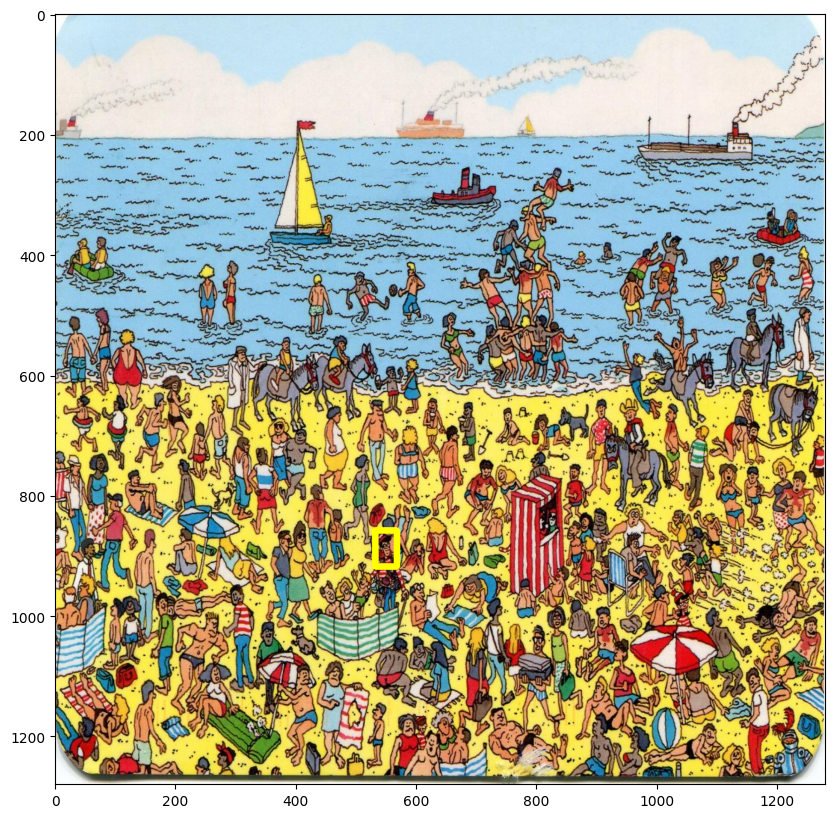

In [4]:
threshold = 0.8
loc = np.where(res >= threshold)
# Вокруг выделенных максимумов обводим прямоугольники с размерами шаблона
plot_img = rgb_img.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(plot_img, pt,(pt[0] + h, pt[1] + w),(0,255,255), 8)

# Отображаем результат на графике
plt.figure()
plt.imshow(cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB))